## Подключение библиотек

In [8]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\сергей\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\сергей\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Объединение датасетов

In [5]:
df_habr=pd.read_csv("habr_parsing.csv")
df_json=pd.read_csv("parsing_data_json_all_version.csv")
df_pdf=pd.read_csv("pdf_spasite_parsing.csv")

In [6]:
df_habr.head(5)

title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN  
1    Пандемия, последствия которой до сих пор наб...    NaN  
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN  
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN  
4  Развитие информационных технологий — от первых...    NaN

In [8]:
df_json.head(5)

title             namecompany description  rating field             date  \
0   NaN  Cybersport.Metaratings         NaN     6.0   NaN  8 декабря 09:30   
1   NaN         ESforce Holding         NaN     6.0   NaN  8 декабря 09:30   
2   NaN         ESforce Holding         NaN    12.0   NaN    29 июля 13:50   
3   NaN         ESforce Holding         NaN    18.0   NaN     9 июля 09:33   
4   NaN         ESforce Holding         NaN    11.0   NaN  11 апреля 12:43   

                                             textpub    views  
0  7 декабря состоялась церемония награждения лау...   2300.0  
1  7 декабря состоялась церемония награждения лау...   2300.0  
2  Из совместного исследования издателя компьютер...   2800.0  
3  По статистике The Esports Observer за I полови...   6200.0  
4  Компании SuperData Research и PayPal провели с...  10000.0

In [13]:
df_pdf.head(5)

title    namecompany  \
0       №1 в разработке цифровых решений для бизнеса  red_mad_robot   
1  Deutsche Telekom и Perplexity объявили о новом...            NaN   
2                #1 Корпоративный облачный провайдер        Cloud4Y   
3                #1 Корпоративный облачный провайдер        Cloud4Y   
4  Yandex N.V. запретили в течение пяти лет созда...            NaN   

   description  rating  field        date  \
0          NaN  117.94    NaN  2025-03-20   
1          NaN    0.00    NaN  2025-03-20   
2          NaN   71.07    NaN  2025-03-20   
3          NaN   71.07    NaN  2025-03-20   
4          NaN    0.00    NaN  2025-03-20   

                                             textpub  views  
0      6 часов назад Средний18 мин redmadrobot Co...    NaN  
1  Еще до начала MWC в Барселоне было очевидно, ч...    NaN  
2     Автор оригинала: Yashwant Singh Взлом Insta...    NaN  
3     Автор оригинала: Yashwant Singh Взлом Insta...    NaN  
4  Нидерландская компания Yandex N.V. по итогам р...    NaN

In [15]:
df = pd.concat([df_habr, df_json, df_pdf])
df = df.reset_index(drop=True)

In [17]:
%%time
df.to_csv('all_data_habr_pdf_json_content.csv', index=False)

CPU times: total: 312 ms
Wall time: 302 ms


In [18]:
# df=pd.read_csv("parsing_data_json.csv")

In [21]:
df.head(1000)

title  \
0    SSTI в Python под микроскопом: разбираем Pytho...   
1                  Противовирусная жевательная резинка   
2    Keycloak: как упростить аутентификацию и не со...   
3    Из чего сделаны GPU от Т1 Облако? Фотообзор и ...   
4    Фундаментальные науки и ИТ: создание исследова...   
..                                                 ...   
995                                                NaN   
996                                                NaN   
997                                                NaN   
998                                                NaN   
999                                                NaN   

                 namecompany  \
0                    BI.ZONE   
1         ua-hosting.company   
2                  Clevertec   
3                 Холдинг Т1   
4                    Инферит   
..                       ...   
995  Студия Артемия Лебедева   
996  Студия Артемия Лебедева   
997  Студия Артемия Лебедева   
998  Студия Артемия Лебедева   
999  Студия Артемия Лебедева   

                                          description  rating  \
0                                            Компания   76.41   
1       Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2    Цифровые решения для бизнеса | финтех, логистика   59.14   
3                          Многопрофильный ИТ-холдинг  125.41   
4                                            Компания  229.82   
..                                                ...     ...   
995                                               NaN    1.00   
996                                               NaN   -1.00   
997                                               NaN   44.00   
998                                               NaN   13.00   
999                                               NaN    6.00   

                                                 field              date  \
0    Программное обеспечение, Веб-сервисы, Информац...        2025-04-09   
1    Аппаратное обеспечение, Связь и телекоммуникац...        2025-04-09   
2    Программное обеспечение, Мобильные технологии,...        2025-04-09   
3    Программное обеспечение, Аппаратное обеспечени...        2025-04-09   
4      Программное обеспечение, Аппаратное обеспечение        2025-04-09   
..                                                 ...               ...   
995                                                NaN  11 февраля 09:38   
996                                                NaN  23 декабря 00:58   
997                                                NaN  13 декабря 15:56   
998                                                NaN   9 декабря 18:02   
999                                                NaN   8 декабря 09:30   

                                               textpub    views  
0    Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...      NaN  
1      Пандемия, последствия которой до сих пор наб...      NaN  
2    Привет! Я Диана, системный аналитик в Cleverte...      NaN  
3    Привет, Хабр. На связи команда Т1 Облако. Если...      NaN  
4    Развитие информационных технологий — от первых...      NaN  
..                                                 ...      ...  
995  В прошлой статье, рассказывая про GPT-J-6B, я ...   5200.0  
996  Первые шаги к ребрендингу начались со смены па...    667.0  
997  Проект ua-hosting.company берёт своё начало ещ...  22000.0  
998  Студия Артемия Лебедева запустила платный онла...   3100.0  
999  7 декабря состоялась церемония награждения лау...   2300.0  

[1000 rows x 8 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        403 non-null    object 
 1   namecompany  1216 non-null   object 
 2   description  383 non-null    object 
 3   rating       1226 non-null   float64
 4   field        382 non-null    object 
 5   date         1226 non-null   object 
 6   textpub      1226 non-null   object 
 7   views        1116 non-null   float64
dtypes: float64(2), object(6)
memory usage: 76.8+ KB


## Предварительная обработка данных

1. Удаление цифр
2. Перевод всех букв в тексте в нижний регистр
3. Удаление знаков препинания
4. Токенизация по словам
5. Удаление латинских символов
6. Удаление стоп слов
7. Стемминг (приведение слов к нормальной форме)
8. Лемматизация

#### 1. Удаление цифр

In [28]:
string.number = '1234567890'

In [30]:
string.number 

'1234567890'

In [32]:
def remove_number(text):
    try:
        text_nonpunct = "".join([char for char in text if char not in string.number])
        return text_nonpunct
    except:
        return text

In [34]:
%%time
df['dont_number_text'] = [remove_number(text) for text in df['textpub']]
df.head()

CPU times: total: 1.95 s
Wall time: 1.95 s


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...  
1    Пандемия, последствия которой до сих пор наб...  
2  Привет! Я Диана, системный аналитик в Cleverte...  
3  Привет, Хабр. На связи команда Т Облако. Если ...  
4  Развитие информационных технологий — от первых...

#### 2 - Перевод всех букв в тексте в нижний регистр

In [36]:
def text_toLowerCase(text: str):
    try:
        text_lower = text.lower()
        return text_lower
    except:
        return text

In [39]:
%%time
df['lower_case'] = [text_toLowerCase(text) for text in df['dont_number_text']]
df.head()

CPU times: total: 109 ms
Wall time: 117 ms


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  
0  привет, хабр! меня зовут сергей арефьев. я спе...  
1    пандемия, последствия которой до сих пор наб...  
2  привет! я диана, системный аналитик в cleverte...  
3  привет, хабр. на связи команда т облако. если ...  
4  развитие информационных технологий — от первых...

#### 3 - Удаление пунктуации

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
string.punctuation = "#$%&\'()*+,-./:;<=>!?@[\\]^_`{|}~«»—"

In [46]:
string.punctuation

"#$%&'()*+,-./:;<=>!?@[\\]^_`{|}~«»—"

In [48]:
def remove_punct(text):
    try:
        text_nonpunct = "".join([char for char in text if char not in string.punctuation])
        return text_nonpunct
    except:
        return text

In [50]:
%%time
df['punctuation_text'] = [remove_punct(text) for text in df['lower_case']]
df.head()

CPU times: total: 1.73 s
Wall time: 1.73 s


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  
0  привет хабр меня зовут сергей арефьев я специа...  
1    пандемия последствия которой до сих пор набл...  
2  привет я диана системный аналитик в clevertec ...  
3  привет хабр на связи команда т облако если вы ...  
4  развитие информационных технологий  от первых ...

#### 4 - Токенизация по словам

In [53]:
import re
def tokenize_text(text):
    try:
        tokens = re.split('\W+', text)
        return tokens
    except:
        return text

<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
C:\Users\сергей\AppData\Local\Temp\ipykernel_11520\857485662.py:4: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W+', text)


In [55]:
%%time
df['tokenize_text'] = [tokenize_text(text) for text in df['punctuation_text']]
df.head()

CPU times: total: 922 ms
Wall time: 921 ms


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  
0  [привет, хабр, меня, зовут, сергей, арефьев, я...  
1  [, пандемия, последствия, которой, до, сих, по...  
2  [привет, я, диана, системный, аналитик, в, cle...  
3  [привет, хабр, на, связи, команда, т, облако, ...  
4  [развитие, информационных, технологий, от, пер...

#### 5 - Удаление латинских символов

In [57]:
def remove_latin_symbols(text):
    return re.sub('[a-z]','', text, flags=re.I)

In [60]:
%%time
df['remove_latin_text'] = [remove_latin_symbols(text) for text in df['punctuation_text']]
df.head()

CPU times: total: 469 ms
Wall time: 463 ms


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  [привет, хабр, меня, зовут, сергей, арефьев, я...   
1  [, пандемия, последствия, которой, до, сих, по...   
2  [привет, я, диана, системный, аналитик, в, cle...   
3  [привет, хабр, на, связи, команда, т, облако, ...   
4  [развитие, информационных, технологий, от, пер...   

                                   remove_latin_text  
0  привет хабр меня зовут сергей арефьев я специа...  
1    пандемия последствия которой до сих пор набл...  
2  привет я диана системный аналитик в  и экспреп...  
3  привет хабр на связи команда т облако если вы ...  
4  развитие информационных технологий  от первых ...

#### 6 - Удаление стоп слов

In [63]:
import nltk
russian_stopwords = stopwords.words("russian")
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [65]:
russian_stopwords.extend(text for text in ['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой', 
                          'такой', 'другой', 'поэтому', 'также', 'например', 'мочь', 'почему', 'которой', 'которому', 'которому'])

In [67]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [69]:
def remove_stopwords_russian(text):
    try:
        t = word_tokenize(text)
        tokens = [token for token in t if token not in russian_stopwords]
        text = " ".join(tokens)
        return text
    except:
        return text

In [71]:
%%time
df['stopwords_russian'] = [remove_stopwords_russian(text) for text in df['remove_latin_text']]
df.head()

CPU times: total: 9.53 s
Wall time: 9.57 s


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  [привет, хабр, меня, зовут, сергей, арефьев, я...   
1  [, пандемия, последствия, которой, до, сих, по...   
2  [привет, я, диана, системный, аналитик, в, cle...   
3  [привет, хабр, на, связи, команда, т, облако, ...   
4  [развитие, информационных, технологий, от, пер...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  
0  привет хабр зовут сергей арефьев специалист от...  
1  пандемия последствия сих пор наблюдаются всему...  
2  привет диана системный аналитик экспреподавате...  
3  привет хабр связи команда облако следите новос...  
4  развитие информационных технологий первых алго...

#### 7 - Стемминг

In [73]:
stemmer = SnowballStemmer("russian")

In [76]:
def stemmer_text(text):
    try:
        t = word_tokenize(text)
        tokens = [stemmer.stem(token) for token in t if token not in russian_stopwords]
        text = " ".join(tokens)
        return text
    except Exception as e:
        return text

In [78]:
%%time
df['stemmer_text'] = [stemmer_text(text) for text in df['stopwords_russian']]
df.head()

CPU times: total: 1min 16s
Wall time: 1min 17s


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  [привет, хабр, меня, зовут, сергей, арефьев, я...   
1  [, пандемия, последствия, которой, до, сих, по...   
2  [привет, я, диана, системный, аналитик, в, cle...   
3  [привет, хабр, на, связи, команда, т, облако, ...   
4  [развитие, информационных, технологий, от, пер...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  
0  привет хабр зовут серг ареф специалист отдел а...  
1  пандем последств сих пор наблюда всем мир пока...  
2  привет диа системн аналитик экспреподавател ст...  
3  привет хабр связ команд облак след новост мир ...  
4  развит информацион технолог перв алгоритм нейр...

#### 8 - Лемматизация

In [81]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [83]:
def lemmatizing_text(text):
    try:
        t = word_tokenize(text)
        result = list()
        for word in t:
            p = morph.parse(word)[0]
            result.append(p.normal_form)
        text = " ".join(result)
        return text
    except:
        return text

In [85]:
%%time
df['lemmatizing_text'] = [lemmatizing_text(text) for text in df['stopwords_russian']]
df.head()

CPU times: total: 2min 53s
Wall time: 2min 53s


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  [привет, хабр, меня, зовут, сергей, арефьев, я...   
1  [, пандемия, последствия, которой, до, сих, по...   
2  [привет, я, диана, системный, аналитик, в, cle...   
3  [привет, хабр, на, связи, команда, т, облако, ...   
4  [развитие, информационных, технологий, от, пер...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  
0  привет

##### попытка удаления стоп слов

In [87]:
%%time
df['lemmatizing_text'] = [remove_stopwords_russian(text) for text in df['lemmatizing_text']]
df.head(50)

CPU times: total: 7.77 s
Wall time: 7.78 s


title  \
0   SSTI в Python под микроскопом: разбираем Pytho...   
1                 Противовирусная жевательная резинка   
2   Keycloak: как упростить аутентификацию и не со...   
3   Из чего сделаны GPU от Т1 Облако? Фотообзор и ...   
4   Фундаментальные науки и ИТ: создание исследова...   
5   Наведение камеры на активный микрофон конферен...   
6   MERGE + OUTPUT: Upsert с логированием без триг...   
7               SQL-пайплайны для A/B тестов: коротко   
8   Что такое тёмная энергия и можно ли в нашей Вс...   
9             Топ новостей инфобеза за март 2025 года   
10   Как работает Трансформер: очень простое описание   
11  Про разработку LLM: какие ещё есть справочники...   
12  SwiftUI: Пишем простое фитнес-приложение с исп...   
13  Чем полезны курсы программирования для школьни...   
14  Amstrad PPC — вспоминаем удивительные персонал...   
15  App Store блокирует аккаунты разработчиков, а ...   
16                  5 Лайфхаков разработчику Power BI   
17  Как создавать в Роблоксе самому игры: мини-гай...   
18  S3: возможности протокола и паттерны использов...   
19  Чарлз Протеус Штейнмец: гигант электротехники ...   
20        Геймеры и сообщества, повлиявшие на геймдев   
21  Интеграционные решения на примере продукта «Ци...   
22  Оценка задач в сторипоинтах по их декомпозиции...   
23  JavaScript: структуры данных и алгоритмы. Част...   
24  Tail-calling: разбираемся в новом интерпретато...   
25  Пахал как лошадь, но опять повысили не меня. П...   
26                Книга: «Head First. Архитектура ПО»   
27  Как устроен call for papers на OFFZONE: от зая...   
28                   Closure::bind() и bindTo() в PHP   
29                        Микросервисы на C#. Часть 1   
30  ChatGPT получил новый генератор изображений и ...   
31  Прятки в пикселях: методы встраивания тайных п...   
32  Изобретения советских писателей-фантастов, кот...   
33  От инженера до главного эксперта: система разв...   
34                   Неизвестно полезный CSS. Часть 8   
35                       Сияние светодиодов и лазеров   
36  Как изменится системный анализ и работа аналит...   
37  Как мы тестируем дизайн внутренних продуктов и...   
38  Продлеваем жизнь матрицы телевизора Haier посл...   
39  Код без if и while: пять языков программирован...   
40  Книги «не про дизайн», из которых дизайнер мож...   
41              Экосистема ПИК. История BIM Inspector   
42        Клонируем правильно: structuredClone() в JS   
43  F6 фиксирует более чем двукратный рост числа в...   
44              FineBi Динамическая фильтрация данных   
45  Кнопка «F5» устала: real-time уведомления в ми...   
46  Регулярные выражения для инженеров тестировани...   
47    Компилируем компилятор или ускоряем javac вдвое   
48  Корм кончился, клиенты разбежались: почему одн...   
49  Гайд для системного аналитика: как управлять т...   

                          namecompany  \
0                             BI.ZONE   
1                  ua-hosting.company   
2                           Clevertec   
3                          Холдинг Т1   
4                             Инферит   
5                Smart-AV Мультимедиа   
6                                OTUS   
7                                OTUS   
8                           RUVDS.com   
9                            T.Hunter   
10                               Raft   
11                                MWS   
12                               OTUS   
13                       IT для детей   
14                          RUVDS.com   
15                               Surf   
16                            Usetech   
17                       IT для детей   
18                             Рунити   
19                      Online patent   
20                           Selectel   
21                             SM Lab   
22                                МТС   
23                      Timeweb Cloud   
24                              Точка   
25                        Minervasoft   
26           Издательский дом «Пи

#### Сохраняем датасет и проверяем на наличие пустых строк

In [90]:
%%time
df.to_csv('all_data_habr_pdf_json_content_lemmatizing_text.csv', index=False)

CPU times: total: 2.38 s
Wall time: 2.4 s


In [91]:
df=pd.read_csv("all_data_habr_pdf_json_content_lemmatizing_text.csv")

In [93]:
for col in df.columns:
    print('%s = %d' % (col, df[col].isna().sum()))

title = 823
namecompany = 10
description = 843
rating = 0
field = 844
date = 0
textpub = 0
views = 110
dont_number_text = 0
lower_case = 0
punctuation_text = 4
tokenize_text = 0
remove_latin_text = 4
stopwords_russian = 4
stemmer_text = 4
lemmatizing_text = 4


Удаляем пустые строчки по столбцу "lemmatizing_text" 

In [97]:
df = df.dropna(subset=['lemmatizing_text'])

In [99]:
df['lemmatizing_text'].isna().sum()

0

In [101]:
%%time
df.to_csv('all_data_habr_pdf_json_content_lemmatizing_text.csv', index=False)

CPU times: total: 2.08 s
Wall time: 2.11 s


## Облако слов

In [103]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [105]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    try:
        for i in corpus:
            str_corpus += ' ' + i
        str_corpus = str_corpus.strip()
    except:
        pass
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    try:
        for phrase in data:
            for word in phrase.split():
                corpus.append(word)
    except:
        pass
    return corpus

# Получение облака слов х1
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

# Получение облака слов х2
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

#### Изначальный текст

CPU times: total: 3min 25s
Wall time: 3min 26s


<Axes: >

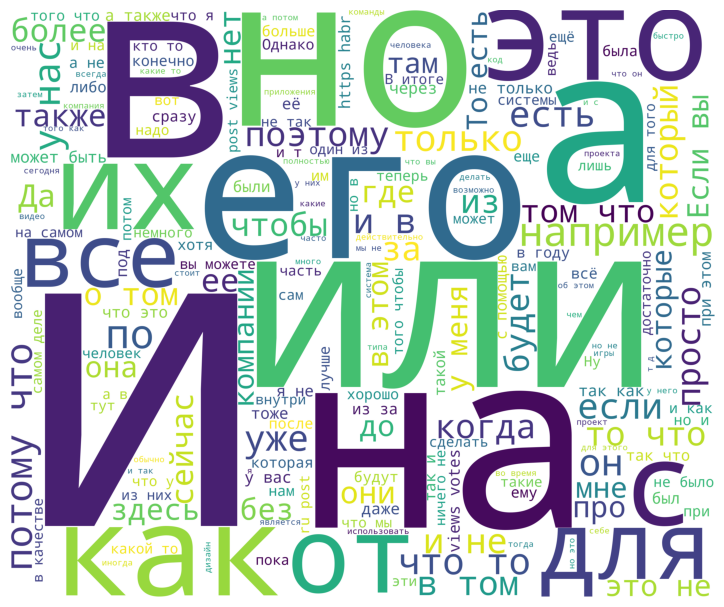

In [111]:
%%time
corpus = get_corpus(df['textpub'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

#### Общий текст после лемматизации

CPU times: total: 1min 39s
Wall time: 1min 39s


<Axes: >

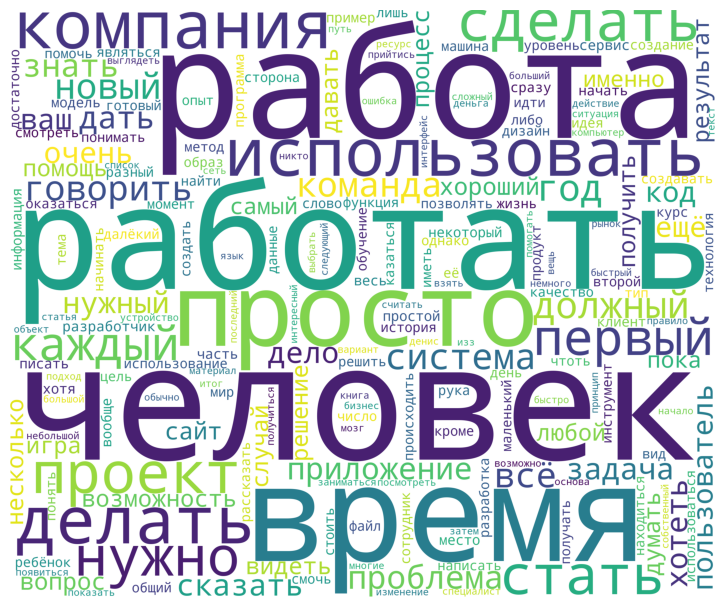

In [114]:
%%time
corpus = get_corpus(df['lemmatizing_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [118]:
df['lemmatizing_text'][1]

'пандемия последствие сей пора наблюдаться весь мир показать иммунолог вирусолог знать давно простой обыватель частенько игнорировать вирус обожать распространяться человек повышение иммунный защита общество путём вакцинация являться проблема ввиду либо отсутствие вакцина необходимый инфраструктура либо нежелание человек вакцинироваться несмотря явный польза стоить учесть далеко вирус иметься полноценный вакцина являться вирус простой герпес впг учёный пенсильванский университет сша разработать необычный метод снижение вирусный нагрузка вид жевательный резинка состоять жвачка именно работать насколько эффективный ответ вопрос узнать доклад учёный основа исследование современный тесно взаимосвязанный мир инфекционный заболевание становиться серьёзный частый угроза изз ряд фактор включая изменение климат плотность население возрасти международный мобильность быстрый урбанизация страна низкий уровень доход слабый принятие мера общественный здравоохранение недавний обеспокоенность вызывать

#### Пример: первая статья

CPU times: total: 14.2 s
Wall time: 14.2 s


<Axes: >

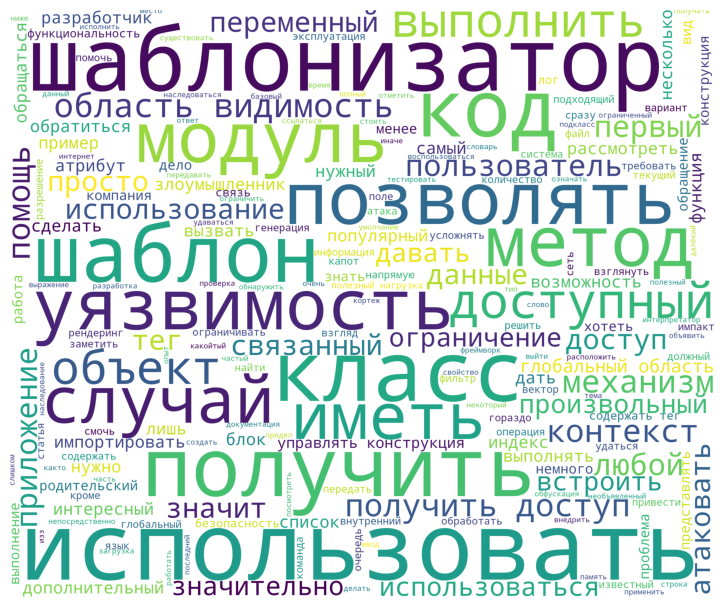

In [121]:
%%time
corpus = df['lemmatizing_text'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

#### Пример: вторая статья

CPU times: total: 13.6 s
Wall time: 13.7 s


<Axes: >

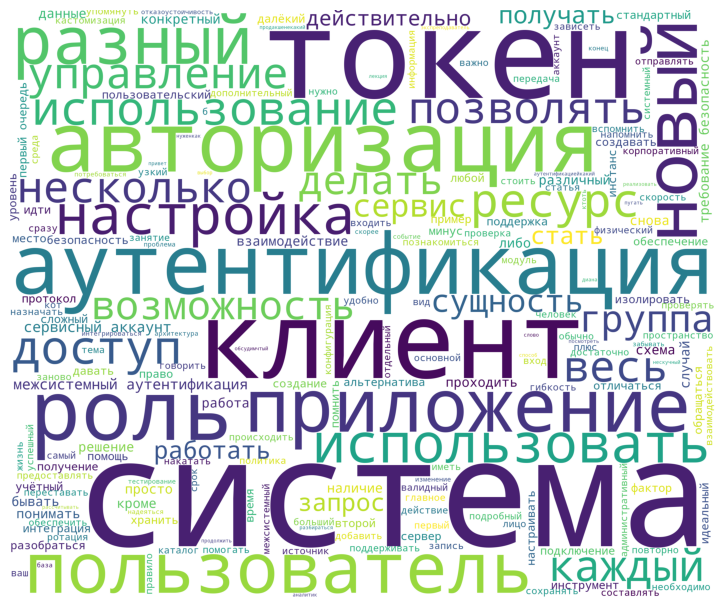

In [123]:
%%time
corpus = df['lemmatizing_text'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

#### Пример: третья статья

CPU times: total: 14.2 s
Wall time: 14.2 s


<Axes: >

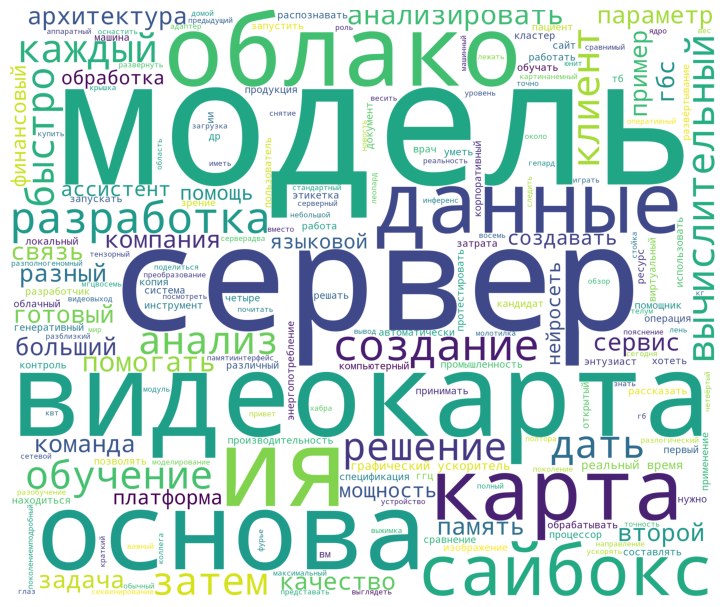

In [125]:
%%time
corpus = df['lemmatizing_text'][3]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

##### Удаление часто встречающихся слов

In [130]:
recurring_stopwords = []
recurring_stopwords.extend(text for text in ['работа', 'работать', 'человек', 'время','который',
                                             'компания', 'делать', 'сделать', 'просто'])

recurring_stopwords

['работа',
 'работать',
 'человек',
 'время',
 'который',
 'компания',
 'делать',
 'сделать',
 'просто']

In [132]:
def remove_stopwords(text):
    try:
        t = word_tokenize(text)
        tokens = [token for token in t if token not in recurring_stopwords]
        text = " ".join(tokens)
        return text
    except:
        return text

In [134]:
%%time
df['lemmatizing_recurring_text'] = [remove_stopwords(text) for text in df['lemmatizing_text']]
df.head()

CPU times: total: 4.81 s
Wall time: 4.8 s


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   
1  ['', 'пандемия', 'последствия', 'которой', 'до...   
2  ['привет', 'я', 'диана', 'системный', 'аналити...   
3  ['привет', 'хабр', 'на', 'связи', 'команда', '...   
4  ['развитие', 'информационных', 'технологий', '...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  \
0  приве

CPU times: total: 1min 42s
Wall time: 1min 42s


<Axes: >

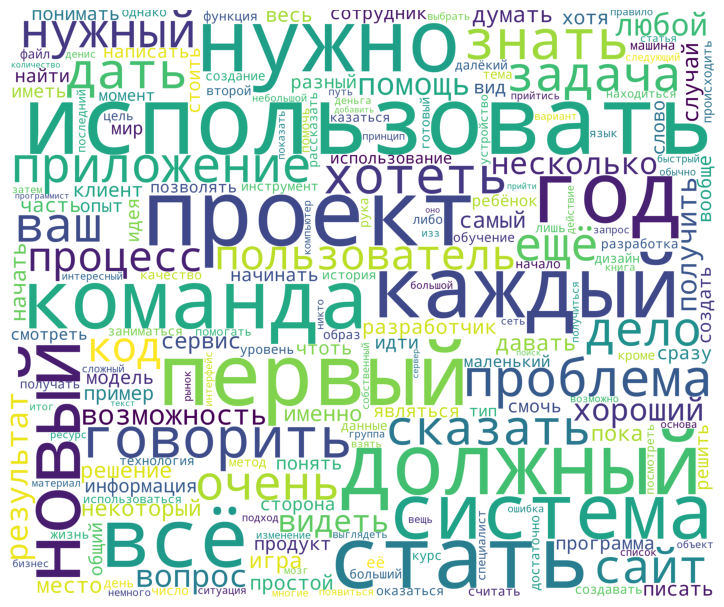

In [136]:
%%time
corpus = get_corpus(df['lemmatizing_recurring_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [138]:
%%time
df.to_csv('all_data_habr_pdf_json_content_lemmatizing_text.csv', index=False)

CPU times: total: 2.38 s
Wall time: 2.37 s


## Векторизация

In [10]:
%%time
df_v = pd.read_csv("all_data_habr_pdf_json_content_lemmatizing_text.csv")
df_v.head()

CPU times: total: 4.38 s
Wall time: 4.38 s


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   
1  ['', 'пандемия', 'последствия', 'которой', 'до...   
2  ['привет', 'я', 'диана', 'системный', 'аналити...   
3  ['привет', 'хабр', 'на', 'связи', 'команда', '...   
4  ['развитие', 'информационных', 'технологий', '...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  \
0  приве

In [12]:
for col in df_v.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df_v[col].isna().sum()))

Кол-во пропусков в колонке title = 819
Кол-во пропусков в колонке namecompany = 10
Кол-во пропусков в колонке description = 839
Кол-во пропусков в колонке rating = 0
Кол-во пропусков в колонке field = 840
Кол-во пропусков в колонке date = 0
Кол-во пропусков в колонке textpub = 0
Кол-во пропусков в колонке views = 110
Кол-во пропусков в колонке dont_number_text = 0
Кол-во пропусков в колонке lower_case = 0
Кол-во пропусков в колонке punctuation_text = 0
Кол-во пропусков в колонке tokenize_text = 0
Кол-во пропусков в колонке remove_latin_text = 0
Кол-во пропусков в колонке stopwords_russian = 0
Кол-во пропусков в колонке stemmer_text = 0
Кол-во пропусков в колонке lemmatizing_text = 0
Кол-во пропусков в колонке lemmatizing_recurring_text = 0


In [19]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(text for text in [
    'т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой', 
    'такой', 'другой', 'поэтому', 'также', 'например', 'мочь', 'почему', 'которой', 'которому', 'которому',
    'работа', 'работать', 'человек', 'время','который',
    'компания', 'делать', 'сделать', 'просто'])

russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

### Bag of words - Мешок слов

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
%%time
count_vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_vectorizer

CPU times: total: 0 ns
Wall time: 0 ns


CountVectorizer(min_df=2, ngram_range=(1, 3),
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [18]:
count_matrix = count_vectorizer.fit_transform(df_v['lemmatizing_recurring_text'])

In [732]:
count_matrix.shape

(1222, 239469)

In [20]:
# (1222, 266171) = 14949
# (1222, 239469)

In [21]:
count_vectorizer.get_feature_names_out()[100000:100100]

array(['накладываться', 'накладываться небольшой',
       'накладываться небольшой культурный', 'накладываться ограничение',
       'наклеечка', 'наклеивание', 'наклеивать', 'наклеить',
       'наклеить откуда', 'наклеить откуда знать', 'наклеить разбираться',
       'наклеить разбираться налепить', 'наклеить стикер', 'наклейка',
       'наклепать', 'накликать', 'наклон', 'наклон градус',
       'наклон спинка', 'наклонить', 'наклониться', 'наклониться вперёд',
       'наклониться следующий', 'наклониться следующий хотеть',
       'наклониться собеседник', 'наклониться собеседник театральный',
       'наклонность', 'наклонный', 'наклонять', 'наковальня', 'наколоть',
       'наконецтый', 'наконецтый лидер', 'наконецтый лидер никуда',
       'наконецтый найти', 'наконецтый найти представлять',
       'наконецтый найтись', 'наконецтый найтись решение',
       'наконецтый начать', 'наконецтый перестать',
       'наконецтый перестать падать', 'наконецтый понять',
       'наконецтый появитьс

In [22]:
count_vectorizer.get_feature_names_out()[163913]

'пройти онлайнкурс'

In [23]:
count_vectorizer.get_feature_names_out()[15319]

'взлететь братва'

In [24]:
count_vectorizer.get_feature_names_out()[85192]

'личный файл'

In [25]:
print(count_matrix)

  (0, 154436)	1
  (0, 226783)	1
  (0, 56639)	1
  (0, 186289)	1
  (0, 200008)	1
  (0, 123958)	1
  (0, 2344)	1
  (0, 56515)	1
  (0, 155875)	8
  (0, 204680)	3
  (0, 228302)	4
  (0, 137546)	1
  (0, 173185)	1
  (0, 211425)	2
  (0, 78476)	9
  (0, 201881)	3
  (0, 116867)	1
  (0, 70517)	2
  (0, 109719)	1
  (0, 177659)	1
  (0, 13118)	3
  (0, 85281)	5
  (0, 15418)	1
  (0, 60727)	3
  (0, 148472)	2
  :	:
  (1221, 221573)	1
  (1221, 79701)	1
  (1221, 7524)	1
  (1221, 90297)	1
  (1221, 177094)	1
  (1221, 102316)	1
  (1221, 162611)	1
  (1221, 114299)	1
  (1221, 160726)	1
  (1221, 102177)	1
  (1221, 239017)	1
  (1221, 212879)	1
  (1221, 136383)	1
  (1221, 164935)	1
  (1221, 99116)	1
  (1221, 231207)	1
  (1221, 99118)	1
  (1221, 34622)	1
  (1221, 35919)	1
  (1221, 205020)	1
  (1221, 99705)	1
  (1221, 141032)	1
  (1221, 208296)	1
  (1221, 150185)	1
  (1221, 68221)	1


### TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf_vectorizer_model = TfidfVectorizer(max_df=0.8, max_features=5000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))
tfidf_vectorizer_model

TfidfVectorizer(max_df=0.8, max_features=5000, min_df=0.01, ngram_range=(1, 3),
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [26]:
%%time
tfidf_matrix_model = tfidf_vectorizer_model.fit_transform(df_v['lemmatizing_recurring_text'])

CPU times: total: 14.7 s
Wall time: 14.8 s


In [27]:
tfidf_matrix_model.shape

(1222, 5000)

In [28]:
# (1222, 10718)

In [29]:
tfidf_vectorizer_model.get_feature_names_out()[800:1000]

array(['десяток', 'десятый', 'десять', 'десять год', 'детализация',
       'деталь', 'детально', 'детальный', 'детский', 'детство', 'дефект',
       'дефицит', 'дешёвый', 'деятельность', 'джеймс', 'джобс', 'джон',
       'джуна', 'диагноз', 'диагностика', 'диаграмма', 'диалог',
       'диаметр', 'диапазон', 'диван', 'дизайн', 'дизайнер',
       'дизайнерский', 'дизайнсистема', 'дикий', 'динамика',
       'динамический', 'динозавр', 'диплом', 'директор', 'директория',
       'диск', 'дискуссия', 'дисплей', 'дистанционный', 'дистанция',
       'дистрибутив', 'дисциплина', 'длина', 'длинный', 'длительность',
       'длительный', 'длиться', 'дмитрий', 'днк', 'добавить',
       'добавление', 'добавлять', 'добавляться', 'добиться', 'добраться',
       'добро', 'добро пожаловать', 'добрый', 'доверие', 'доверять',
       'довести', 'довольно', 'довольно быстро', 'довольный',
       'догадаться', 'догадываться', 'договариваться', 'договор',
       'договориться', 'дождаться', 'дождь', 'доза', '

In [30]:
tfidf_vectorizer_model.get_feature_names_out()[4567]

'указатель'

In [31]:
print(tfidf_matrix_model)

  (0, 1275)	0.017164123032019987
  (0, 888)	0.018864869692322178
  (0, 4791)	0.017933365795509564
  (0, 1375)	0.017294411890163255
  (0, 2232)	0.01833269024399272
  (0, 130)	0.01349433158499252
  (0, 2970)	0.019924538036158908
  (0, 2969)	0.019469831273609572
  (0, 2790)	0.018864869692322178
  (0, 4427)	0.011153818490345505
  (0, 2676)	0.03499465062705081
  (0, 275)	0.020170684793153884
  (0, 219)	0.032173467861979034
  (0, 2681)	0.024681646212902402
  (0, 2619)	0.019157030630898395
  (0, 4159)	0.01841706425834058
  (0, 1485)	0.019057487074933318
  (0, 3543)	0.019363091124959896
  (0, 4394)	0.02203042816746347
  (0, 2124)	0.01841706425834058
  (0, 2968)	0.16351754277201994
  (0, 1555)	0.03666538048798544
  (0, 3772)	0.01841706425834058
  (0, 221)	0.01412604103281763
  (0, 3778)	0.01703755722668932
  :	:
  (1221, 4840)	0.06034768862431998
  (1221, 1038)	0.016821308753733947
  (1221, 2453)	0.012816736213961098
  (1221, 742)	0.23247869510073965
  (1221, 641)	0.04693304395522988
  (1221, 1

## Кластeризация

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [40]:
X = tfidf_matrix_model
# X = X.toarray()

### KMeans

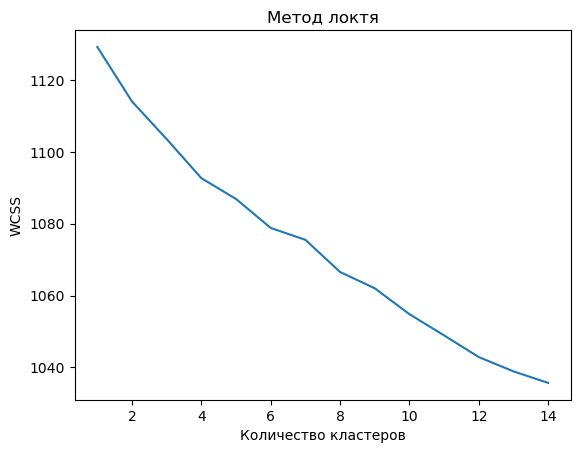

CPU times: total: 8.77 s
Wall time: 2.99 s


In [57]:
%%time
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [624]:
num_clusters = 10
# num_clusters = 9
# num_clusters = 20
# num_clusters = 7
#num_clusters = 15
# num_clusters = 4

In [625]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [626]:
kmeans.fit(X)

KMeans(n_clusters=10, n_init=10)

In [152]:
pred=kmeans.fit_predict(X)

In [154]:
labels=kmeans.labels_
print(labels)

[16 13 16 ... 16 15  2]


In [125]:
df_v['kmeans_cluster'] = pd.Series(labels)
df_v.head()

title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т1 облако. если...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т1 облако если вы...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   
1  ['', 'пандемия', 'последствия', 'которой', 'до...   
2  ['привет', 'я', 'диана', 'системный', 'аналити...   
3  ['привет', 'хабр', 'на', 'связи', 'команда', '...   
4  ['развитие', 'информационных', 'технологий', '...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т1 облако если вы...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда т1 облако следите но...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд т1 облак след новост м...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  kmeans_cluster  
0  привет хабра звать сергей арефьев специалист о...             4.0  
1  пандемия последствие сей пора наблюдаться весь...             7.0  
2  привет диана системный аналитик экспреподавате...             4.0  
3  привет хабра связь команда т1 облако следить н...             4.0  
4  развитие информационный технология первый а

### AgglomerativeClustering

In [60]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot

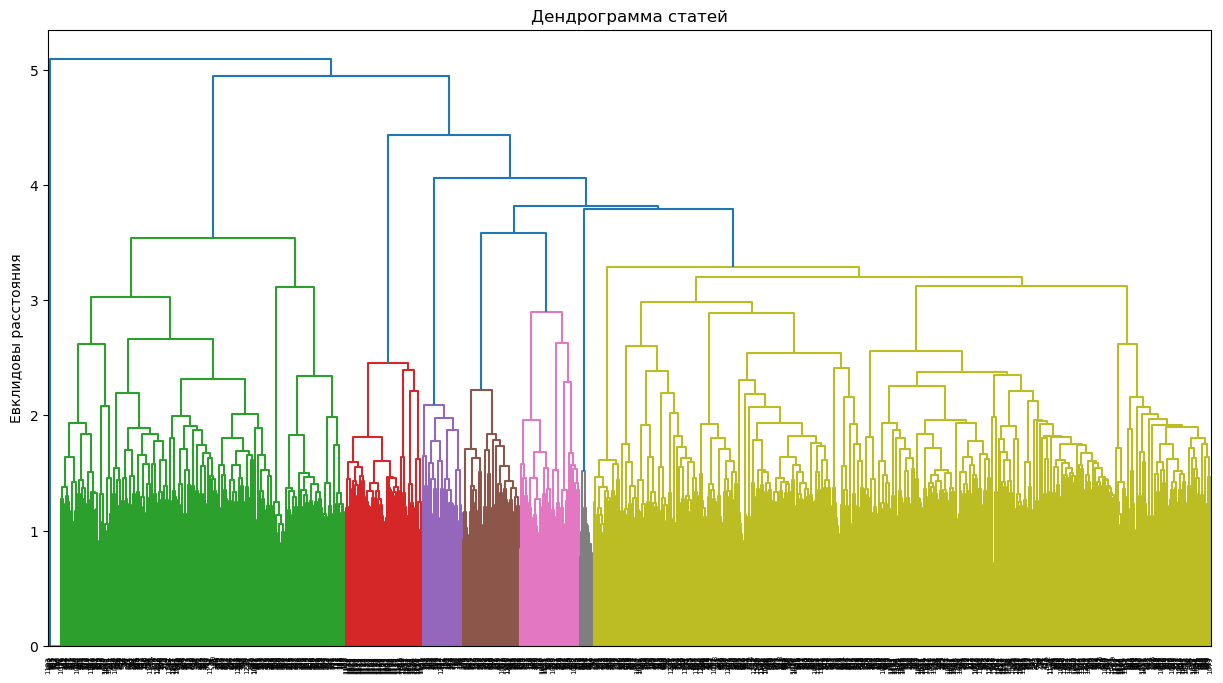

In [62]:
pyplot.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(X.toarray(), method = 'ward'))
plt.title('Дендрограмма статей')
plt.ylabel('Евклидовы расстояния')
plt.show()

In [64]:
clustering_ward = AgglomerativeClustering(7).fit(X.toarray())
pred_ward = clustering_ward.labels_

In [65]:
df_v['agglmr_cluster'] = pd.Series(pred_ward)
df_v.head()

title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   
1  ['', 'пандемия', 'последствия', 'которой', 'до...   
2  ['привет', 'я', 'диана', 'системный', 'аналити...   
3  ['привет', 'хабр', 'на', 'связи', 'команда', '...   
4  ['развитие', 'информационных', 'технологий', '...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  \
0  приве

In [68]:
for col in df_v.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df_v[col].isna().sum()))

Кол-во пропусков в колонке title = 819
Кол-во пропусков в колонке namecompany = 10
Кол-во пропусков в колонке description = 839
Кол-во пропусков в колонке rating = 0
Кол-во пропусков в колонке field = 840
Кол-во пропусков в колонке date = 0
Кол-во пропусков в колонке textpub = 0
Кол-во пропусков в колонке views = 110
Кол-во пропусков в колонке dont_number_text = 0
Кол-во пропусков в колонке lower_case = 0
Кол-во пропусков в колонке punctuation_text = 0
Кол-во пропусков в колонке tokenize_text = 0
Кол-во пропусков в колонке remove_latin_text = 0
Кол-во пропусков в колонке stopwords_russian = 0
Кол-во пропусков в колонке stemmer_text = 0
Кол-во пропусков в колонке lemmatizing_text = 0
Кол-во пропусков в колонке lemmatizing_recurring_text = 0
Кол-во пропусков в колонке agglmr_cluster = 0


agglmr_cluster
5    649
2    300
0    123
1     80
4     43
6     14
3     13
Name: count, dtype: int64


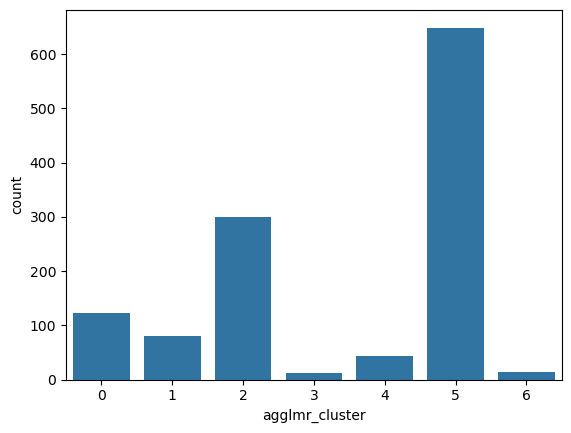

In [70]:
# Смотрим распределение по кластерам
print(df_v['agglmr_cluster'].value_counts())
sns.countplot(x='agglmr_cluster', data=df_v)
plt.show()

In [72]:
# df_v = df_v.dropna(subset=['agglmr_cluster'])

### Рисование облака слов по кластерам - облачная кластеризация

In [75]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# Получение текстовой строки из списка слов
def str_corpus_clustering(corpus):
    str_corpus = ''
    try:
        for i in corpus:
            str_corpus += ' ' + i
        str_corpus = str_corpus.strip()
    except:
        pass
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus_clustering(data):
    corpus = []
    try:
        for phrase in data:
            for word in phrase.split():
                corpus.append(word)
    except:
        pass
    return corpus

In [79]:
def get_wordCloud_agglmr_clustering(cluster):
    df_v_cluster = df_v[df_v['agglmr_cluster'] == cluster]
    corpus = get_corpus_clustering(df_v_cluster['lemmatizing_text'].values)
    
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus_clustering(corpus))
    return wordCloud

In [81]:
def wordCloud_agglmr_cluster():
    for i in range(df_v['agglmr_cluster'].nunique()):
        print(f'AgglomerativeClustering cluster: {i}')
        wordCloud_cluster = get_wordCloud_agglmr_clustering(i)
        fig = plt.figure(figsize=(15, 8))
        plt.subplot(1, 2, 1)
        plt.imshow(wordCloud_cluster)
        plt.axis('off')
        plt.show()
        print(f'\n\n')

AgglomerativeClustering cluster: 0


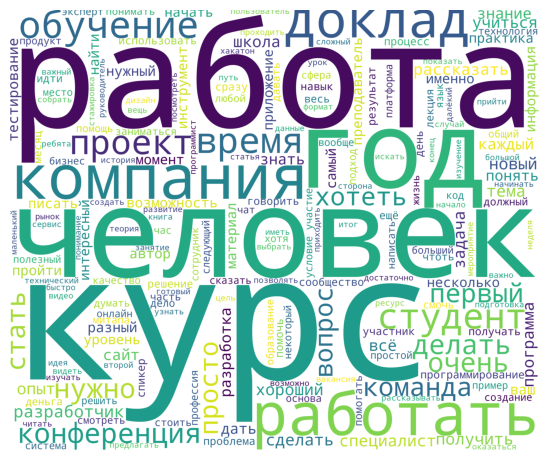




AgglomerativeClustering cluster: 1


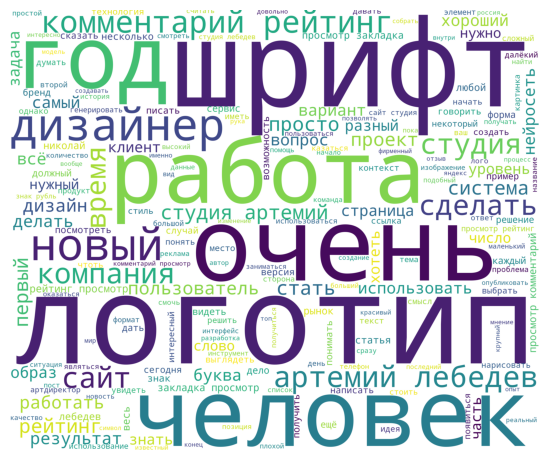




AgglomerativeClustering cluster: 2


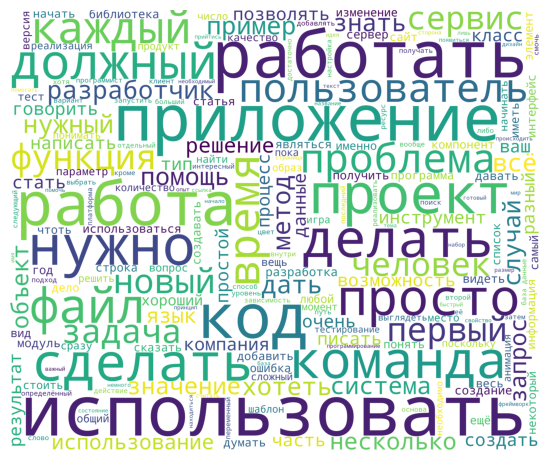




AgglomerativeClustering cluster: 3


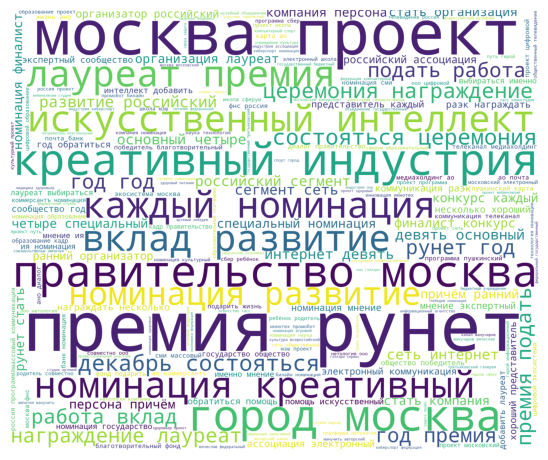




AgglomerativeClustering cluster: 4


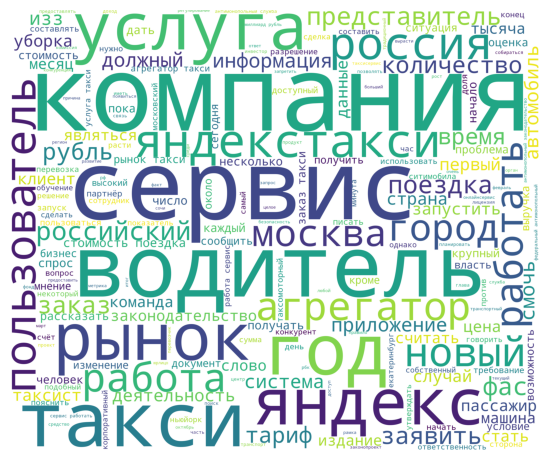




AgglomerativeClustering cluster: 5


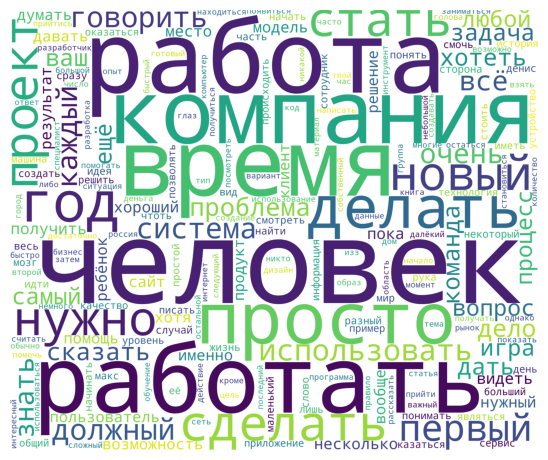




AgglomerativeClustering cluster: 6


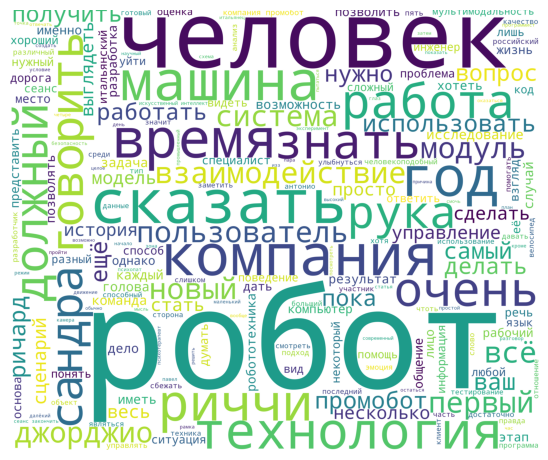




CPU times: total: 2min 22s
Wall time: 2min 22s


In [83]:
%%time
wordCloud_agglmr_cluster()

### Добавление названия к кластерам

Из облака слов каждого кластера, были выбраны ключевые слова, описывающие данный кластер.

0) Человек и работа
1) Дизайн 
2) Приложение и работа
3) Московский проект премии рунета
4) Сервис компании водителей яндекс такси
5) Работа человека в компании
6) Машина/робот и чловек


In [87]:
dt_agglmr_name = { 
    0: 'Человек и работа', 
    1: 'Дизайн', 
    2: 'Приложение и работа',
    3: 'Московский проект премии рунета',
    4: 'Сервис компании водителей яндекс такси',
    5: 'Работа человека в компании',
    6: 'Машина/робот и человек'
}

In [89]:
dt_agglmr_name

{0: 'Человек и работа',
 1: 'Дизайн',
 2: 'Приложение и работа',
 3: 'Московский проект премии рунета',
 4: 'Сервис компании водителей яндекс такси',
 5: 'Работа человека в компании',
 6: 'Машина/робот и человек'}

In [91]:
df_v['agglmr_cluster_name'] = df_v['agglmr_cluster'].map(dt_agglmr_name)
df_v.head()

title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   
1  ['', 'пандемия', 'последствия', 'которой', 'до...   
2  ['привет', 'я', 'диана', 'системный', 'аналити...   
3  ['привет', 'хабр', 'на', 'связи', 'команда', '...   
4  ['развитие', 'информационных', 'технологий', '...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  \
0  приве

##### Сохраняем данные в файл для дальнейшей удобной работы

In [94]:
file_name = 'all_content_parsing_name_cluster.csv'
df_v.to_csv(file_name, index=False)

## Тематическое моделирование

In [96]:
import gensim

In [99]:
# verctorizer_all_parsing_name_cluster_
# all_content_parsing_name_cluster

In [101]:
df_t=pd.read_csv("all_content_parsing_name_cluster.csv")
df_t.head()

title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   
1  ['', 'пандемия', 'последствия', 'которой', 'до...   
2  ['привет', 'я', 'диана', 'системный', 'аналити...   
3  ['привет', 'хабр', 'на', 'связи', 'команда', '...   
4  ['развитие', 'информационных', 'технологий', '...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  \
0  приве

#### Просмотр тем с помощью графика LDA

In [103]:
def tokenize_test(text):
    tokens = word_tokenize(text)
    return tokens

In [104]:
%%time
df_t['tokenize_lemmatizing_text'] = [tokenize_test(text) for text in df_t['lemmatizing_recurring_text']]
df_t.head()

CPU times: total: 5.06 s
Wall time: 5.09 s


title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   
1  ['', 'пандемия', 'последствия', 'которой', 'до...   
2  ['привет', 'я', 'диана', 'системный', 'аналити...   
3  ['привет', 'хабр', 'на', 'связи', 'команда', '...   
4  ['развитие', 'информационных', 'технологий', '...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  \
0  приве

In [108]:
%%time
gensim_dictionary = gensim.corpora.Dictionary(df_t['tokenize_lemmatizing_text'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

CPU times: total: 1.38 s
Wall time: 1.39 s


In [109]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df_t['tokenize_lemmatizing_text']]

In [110]:
len(corpus)

1222

In [111]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [116]:
%%time
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=10, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

CPU times: total: 1min 24s
Wall time: 44.2 s


In [117]:
lda_20.print_topics()

[(0,
  '0.037*"робот" + 0.021*"номинация" + 0.017*"кресло" + 0.010*"рунет" + 0.008*"премия" + 0.008*"гипотеза" + 0.007*"спинка" + 0.007*"удалёнка" + 0.006*"кандидат" + 0.006*"сидение"'),
 (1,
  '0.014*"денис" + 0.005*"дверь" + 0.004*"камера" + 0.004*"чип" + 0.004*"стена" + 0.004*"голос" + 0.003*"нога" + 0.003*"мечта" + 0.003*"станция" + 0.003*"герой"'),
 (2,
  '0.041*"•" + 0.008*"игрок" + 0.008*"вебинар" + 0.008*"фильм" + 0.008*"артём" + 0.007*"шрифт" + 0.005*"мощность" + 0.005*"подборка" + 0.004*"анимация" + 0.004*"смартфон"'),
 (3,
  '0.009*"маска" + 0.006*"товар" + 0.004*"самолёт" + 0.004*"подпись" + 0.004*"вирус" + 0.004*"коронавирус" + 0.003*"стенд" + 0.003*"пандемия" + 0.003*"граф" + 0.003*"полёт"'),
 (4,
  '0.042*"лицензия" + 0.040*"рейтинг" + 0.014*"такси" + 0.013*"сергей" + 0.012*"ия" + 0.012*"водитель" + 0.012*"просмотр" + 0.007*"евгений" + 0.006*"дмитрий" + 0.005*"яндекстакси"'),
 (5,
  '0.021*"шрифт" + 0.012*"мониторинг" + 0.009*"сущность" + 0.007*"буква" + 0.007*"уведомлен

In [118]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [119]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [120]:
pyLDAvis.enable_notebook()

In [121]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.160013 -0.009557       1        1  18.184631
6     -0.116067 -0.035071       2        1  17.953839
8     -0.025355  0.122724       3        1  17.679976
9      0.038719 -0.004635       4        1  11.665876
3      0.029072 -0.066661       5        1  10.370433
7      0.105153  0.033569       6        1   8.888097
4     -0.101801  0.007960       7        1   4.774833
2     -0.140405  0.043420       8        1   4.354768
0     -0.006201 -0.178885       9        1   3.077835
5      0.056871  0.087137      10        1   3.049711, topic_info=          Term        Freq       Total Category  logprob  loglift
1667  лицензия  764.000000  764.000000  Default  30.0000  30.0000
3206   рейтинг  767.000000  767.000000  Default  29.0000  29.0000
4170         •  656.000000  656.000000  Default  28.0000  28.0000
2228     робот  575.000000  575.000000  Default  27.0000  27.0000
3818     денис  995.000000  995.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2413   логотип   31.591733  292.042268  Topic10  -5.8611   1.2661
304   протокол   30.413128  286.782569  Topic10  -5.8992   1.2463
819    метрика   29.427842  262.719252  Topic10  -5.9321   1.3010
2570      тело   25.345914  395.580362  Topic10  -6.0814   0.7424
2883      лист   24.325237  148.262437  Topic10  -6.1225   1.6827

[555 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1453      1  0.496531  автомобиль
1453      2  0.049947  автомобиль
1453      3  0.061699  автомобиль
1453      4  0.026442  автомобиль
1453      5  0.096956  автомобиль
...     ...       ...         ...
1225      5  0.027777           →
1225      6  0.083332           →
1225      8  0.034722           →
1225      9  0.024305           →
1225     10  0.024305           →

[3619 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 9, 10, 4, 8, 5, 3, 1, 6])

In [122]:
%%time
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
                                 texts=df_t['tokenize_lemmatizing_text'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

Когерентность модели: 0.36034724588569866
CPU times: total: 844 ms
Wall time: 16.2 s


### Предпоготовка данных

In [131]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(text for text in [
    'т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой', 
    'такой', 'другой', 'поэтому', 'также', 'например', 'мочь', 'почему', 'которой', 'которому', 'которому',
    'работа', 'работать', 'человек', 'время','который',
    'компания', 'делать', 'сделать', 'просто'])

russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

In [269]:
%%time
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
vectorizer

CPU times: total: 0 ns
Wall time: 0 ns


CountVectorizer(min_df=2, ngram_range=(1, 3),
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [271]:
count_matrix = vectorizer.fit_transform(df_v['lemmatizing_text'])

In [272]:
count_matrix.shape

(1222, 239469)

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [391]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000,
                                   min_df=0.01,
                                   max_df=0.8,
                                   stop_words=russian_stopwords,
                                   ngram_range=(1,3))
tfidf_vectorizer

TfidfVectorizer(max_df=0.8, max_features=10000, min_df=0.01, ngram_range=(1, 3),
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [395]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df_v['lemmatizing_text'])

CPU times: total: 15.6 s
Wall time: 15.8 s


In [398]:
tfidf_matrix.shape

(1222, 10000)

In [425]:
### TF-IDF
tfidf_vectorizer_m = TfidfVectorizer()
# tfidf_vectorizer_m = tfidf_vectorizer_m.fit(df_v['lemmatizing_text'])
tfidf_vectorizer_m

TfidfVectorizer()

In [427]:
tfidf_matrix_m = tfidf_vectorizer_m.fit_transform(df_v['lemmatizing_text'])
tfidf_matrix_m.shape

(1222, 68852)

#### Создание словарей для тематического моделирования

In [276]:
dt_agglmr_count_vectorizer = dict()
dt_agglmr_count_vectorizer

{}

In [278]:
def count_martix_vectorization(cluster):
    content = df_t[df_t['agglmr_cluster'] == cluster]
    count_matrix = vectorizer.fit_transform(content['lemmatizing_recurring_text'])
    return count_matrix

In [280]:
def agglmr_cluster_count_vectorization():
    for i in range(df_t['agglmr_cluster'].nunique()):
        print(f'AgglomerativeClustering cluster: {i}')
        count_martix_f = count_martix_vectorization(i)
        
        print(f'Размерность: {count_martix_f.shape}\n')
        dt_agglmr_count_vectorizer[i] = [count_martix_f]

In [282]:
%%time
agglmr_cluster_count_vectorization()

AgglomerativeClustering cluster: 0
Размерность: (123, 21537)

AgglomerativeClustering cluster: 1
Размерность: (80, 3195)

AgglomerativeClustering cluster: 2
Размерность: (300, 36791)

AgglomerativeClustering cluster: 3
Размерность: (13, 923)

AgglomerativeClustering cluster: 4
Размерность: (43, 3953)

AgglomerativeClustering cluster: 5
Размерность: (649, 166236)

AgglomerativeClustering cluster: 6
Размерность: (14, 1549)

CPU times: total: 7.45 s
Wall time: 7.49 s


In [283]:
dt_agglmr_count_vectorizer

{0: [<123x21537 sparse matrix of type '<class 'numpy.int64'>'
  	with 96182 stored elements in Compressed Sparse Row format>],
 1: [<80x3195 sparse matrix of type '<class 'numpy.int64'>'
  	with 12574 stored elements in Compressed Sparse Row format>],
 2: [<300x36791 sparse matrix of type '<class 'numpy.int64'>'
  	with 203855 stored elements in Compressed Sparse Row format>],
 3: [<13x923 sparse matrix of type '<class 'numpy.int64'>'
  	with 11999 stored elements in Compressed Sparse Row format>],
 4: [<43x3953 sparse matrix of type '<class 'numpy.int64'>'
  	with 12219 stored elements in Compressed Sparse Row format>],
 5: [<649x166236 sparse matrix of type '<class 'numpy.int64'>'
  	with 786395 stored elements in Compressed Sparse Row format>],
 6: [<14x1549 sparse matrix of type '<class 'numpy.int64'>'
  	with 4532 stored elements in Compressed Sparse Row format>]}

In [429]:
def tfidf_martix_vectorization(cluster):
    content = df_t[df_t['agglmr_cluster'] == cluster]
    try:
        tfidf_matrix = tfidf_vectorizer.fit_transform(content['lemmatizing_recurring_text'])
        return tfidf_matrix
    except:
        print(f'Ошибка! - {cluster} кластер');
        
        tfidf_matrix_m = tfidf_vectorizer_m.fit_transform(content['lemmatizing_recurring_text'])
        return tfidf_matrix_m

In [430]:
def agglmr_cluster_tfidf_vectorization():
    for i in range(df_t['agglmr_cluster'].nunique()):
        print(f'AgglomerativeClustering cluster: {i}')
        tfidf_martix_f = tfidf_martix_vectorization(i)
        
        print(f'Размерность: {tfidf_martix_f.shape}\n')
        dt_agglmr_tfidf_vectorizer[i] = [tfidf_martix_f]

In [432]:
dt_agglmr_tfidf_vectorizer = dict()
dt_agglmr_tfidf_vectorizer

{}

In [435]:
%%time
agglmr_cluster_tfidf_vectorization()

AgglomerativeClustering cluster: 0
Размерность: (123, 10000)

AgglomerativeClustering cluster: 1
Размерность: (80, 10000)

AgglomerativeClustering cluster: 2
Размерность: (300, 10000)

AgglomerativeClustering cluster: 3
Ошибка! - 3 кластер
Размерность: (13, 235)

AgglomerativeClustering cluster: 4
Размерность: (43, 10000)

AgglomerativeClustering cluster: 5
Размерность: (649, 10000)

AgglomerativeClustering cluster: 6
Размерность: (14, 10000)

CPU times: total: 14.6 s
Wall time: 14.8 s


In [437]:
dt_agglmr_tfidf_vectorizer

{0: [<123x10000 sparse matrix of type '<class 'numpy.float64'>'
  	with 72810 stored elements in Compressed Sparse Row format>],
 1: [<80x10000 sparse matrix of type '<class 'numpy.float64'>'
  	with 19102 stored elements in Compressed Sparse Row format>],
 2: [<300x10000 sparse matrix of type '<class 'numpy.float64'>'
  	with 145494 stored elements in Compressed Sparse Row format>],
 3: [<13x235 sparse matrix of type '<class 'numpy.float64'>'
  	with 3055 stored elements in Compressed Sparse Row format>],
 4: [<43x10000 sparse matrix of type '<class 'numpy.float64'>'
  	with 18120 stored elements in Compressed Sparse Row format>],
 5: [<649x10000 sparse matrix of type '<class 'numpy.float64'>'
  	with 396042 stored elements in Compressed Sparse Row format>],
 6: [<14x10000 sparse matrix of type '<class 'numpy.float64'>'
  	with 12959 stored elements in Compressed Sparse Row format>]}

### LDA - Latent Dirichlet allocation

In [296]:
import random

In [287]:
from sklearn.decomposition import LatentDirichletAllocation

In [375]:
def lda_model_dt(matrix):
    lda_model = LatentDirichletAllocation(n_components=6, random_state=0)
    lda_model.fit(matrix)
    
    # вывод топ слов для каждого кластера
    for i, topic in enumerate(lda_model.components_):
        text = ''
        for j in topic.argsort()[:-5:-1]:
            if j > len(vectorizer.get_feature_names_out()):
                rnd = random.randint(0, len(vectorizer.get_feature_names_out()) - 1)
                text += f' {vectorizer.get_feature_names_out()[rnd]}'
                continue
            text += f' {vectorizer.get_feature_names_out()[j]}'
        print(f'    Тема {i}: {text}')

In [376]:
for i in range(len(dt_agglmr_count_vectorizer)):
    print(f'Кластер {i}: ')
    lda_model_dt(*dt_agglmr_count_vectorizer[i])
    print('\n')

Кластер 0: 
    Тема 0:  снизить культура меняться правый
    Тема 1:  роль буквально магазин навигация
    Тема 2:  должный появиться профессия первый соединение
    Тема 3:  рекомендовать замерить вред низкий
    Тема 4:  причина производство основный негуманный
    Тема 5:  интересно падение понадобиться делиться


Кластер 1: 
    Тема 0:  робот операция промобот олег кивокурец ваш робот получать
    Тема 1:  вид кубик риа новость инструмент
    Тема 2:  расти встретить сбербанк сторона робот разобраться
    Тема 3:  вопервое проверка код последний разобраться
    Тема 4:  вычисление использовать робот плюс промобот олег кивокурец
    Тема 5:  разобраться максимальный сша рассказывать


Кластер 2: 
    Тема 0:  разработка вычисление восприятие лёгкость
    Тема 1:  поворачиваться измерять мышца показать
    Тема 2:  сбербанк робот расположить функционал робот максимально
    Тема 3:  память расширение передвигаться добавить
    Тема 4:  разобраться внимание манера покидать
    Тема 

### NMF - Non-negative matrix factorization

In [440]:
from sklearn.decomposition import NMF

In [461]:
def nmf_model_dt(nmf_matrix):
    nmf_model = NMF(n_components=7, random_state=0)
    nmf_model.fit(nmf_matrix)
    
    # вывод топ слов для каждого кластера
    for i, topic in enumerate(nmf_model.components_):
        print(f'    Тема {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-5:-1]])}')

In [462]:
for i in range(len(dt_agglmr_tfidf_vectorizer)):
    print(f'Кластер {i}:')
    nmf_model_dt(*dt_agglmr_tfidf_vectorizer[i])
    print('\n')

Кластер 0:
    Тема 0: понимать писать комментарий, принять дать, эффект робот, ричард антонио
    Тема 1: плохой любой, полёт фантазия, удивительно, расхохотаться сандра
    Тема 2: чернобелый картинка, психика ричард разделить, число хрупкий, психика робот позволить
    Тема 3: выражение лицо, вместе, пробел клавиша ввод, чёрный зеркало
    Тема 4: понимать писать комментарий, условие кубик, уметь приободрить, английский
    Тема 5: шоу, получить заказ сравнительно, чп отправлять, поддержка очень
    Тема 6: порусски робот, понимать писать комментарий, сценарий психологический защита, сценарий вызывать больший


Кластер 1:
    Тема 0: юнит обычно голова, восприниматься, полоса притормаживать разглядеть, полноценно сравнивать воспринять
    Тема 1: ткнуть палец, уничтожение человечество восстать, имитировать эмоция, поддерживать обновлять
    Тема 2: нынешний, нэ бауман, умышленный, ранее
    Тема 3: упоминаться, употребить чуждый русский, человечность, человечность взять
    Тема 4: 

### LSA - Latent semantic analysis

In [447]:
from sklearn.decomposition import TruncatedSVD

In [465]:
def lsa_model_dt(lsa_matrix):
    lsa_model = TruncatedSVD(n_components=7, random_state=0)
    lsa_model.fit(lsa_matrix)
    
    # вывод топ слов для каждого кластера
    for i, topic in enumerate(lsa_model.components_):
        print(f'    Тема {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-5:-1]])}')

In [467]:
for i in range(len(dt_agglmr_tfidf_vectorizer)):
    print(f'Кластер {i}:')
    lsa_model_dt(*dt_agglmr_tfidf_vectorizer[i])
    print('\n')

Кластер 0:
    Тема 0: понимать писать комментарий, плохой любой, принять дать, уметь приободрить
    Тема 1: понимать писать комментарий, уметь приободрить, принять дать, эффект робот
    Тема 2: чернобелый картинка, психика ричард разделить, число хрупкий, психика робот позволить
    Тема 3: выражение лицо, шоу, пробел клавиша ввод, чёрный зеркало
    Тема 4: условие кубик, понимать писать комментарий, выражение лицо, вместе
    Тема 5: шоу, полагать всё ещё, чп отправлять, получить заказ сравнительно
    Тема 6: сценарий психологический защита, сэм сейферт инженер, чёрный зеркало, расхохотаться сандра


Кластер 1:
    Тема 0: упоминаться, повредить остальной психика, юнит обычно голова, ткнуть палец
    Тема 1: ткнуть палец, разговаривать впечатлить, уничтожение человечество восстать, поддерживать обновлять
    Тема 2: нынешний, нэ бауман, ткнуть палец, умышленный
    Тема 3: повредить остальной психика, подход, ткнуть палец, пожар
    Тема 4: юнит обычно голова, разговаривать впеча

### Добавление названия к кластерам - после тематического моделирования

За основу взяты темы модели LSA. 

Для каждого кластера была построена модель тематического моделирования. Модель определила несколько тем для описания кластера. Были выбраны несколько слов из каждой темы и назван кластер с помощью тематического моделирования.

In [473]:
dt_agglmr_name_lsa = { 
    0: 'Психология человека', 
    1: 'Человек', 
    2: 'Робопсихология/человекоподобный робот',
    3: 'Автомобили',
    4: 'Тестирование алгоритмов робототехники',
    5: 'Робот',
    6: 'Российская робототехника и технологии'
}

In [474]:
dt_agglmr_name_lsa

{0: 'Психология человека',
 1: 'Человек',
 2: 'Робопсихология/человекоподобный робот',
 3: 'Автомобили',
 4: 'Тестирование алгоритмов робототехники',
 5: 'Робот',
 6: 'Российская робототехника и технологии'}

In [477]:
df_v['agglmr_lsa_name'] = df_v['agglmr_cluster'].map(dt_agglmr_name_lsa)
df_v.head()

title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   
1  ['', 'пандемия', 'последствия', 'которой', 'до...   
2  ['привет', 'я', 'диана', 'системный', 'аналити...   
3  ['привет', 'хабр', 'на', 'связи', 'команда', '...   
4  ['развитие', 'информационных', 'технологий', '...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  \
0  приве

In [479]:
df_v['namecompany'] = df_v['namecompany'].fillna('-')

In [480]:
file_name = 'all_content_parsing_topic_model.csv'
df_v.to_csv(file_name, index=False)

## Классификация

In [489]:
df_sk = pd.read_csv("all_content_parsing_topic_model.csv")
df_sk.head()

title         namecompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   
1    Пандемия, последствия которой до сих пор наб...    NaN   
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN   
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN   
4  Развитие информационных технологий — от первых...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т Облако. Если ...   
4  Развитие информационных технологий — от первых...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   
1    пандемия, последствия которой до сих пор наб...   
2  привет! я диана, системный аналитик в cleverte...   
3  привет, хабр. на связи команда т облако. если ...   
4  развитие информационных технологий — от первых...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   
1  ['', 'пандемия', 'последствия', 'которой', 'до...   
2  ['привет', 'я', 'диана', 'системный', 'аналити...   
3  ['привет', 'хабр', 'на', 'связи', 'команда', '...   
4  ['развитие', 'информационных', 'технологий', '...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   
1    пандемия последствия которой до сих пор набл...   
2  привет я диана системный аналитик в  и экспреп...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий  от первых ...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия сих пор наблюдаются всему...   
2  привет диана системный аналитик экспреподавате...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств сих пор наблюда всем мир пока...   
2  привет диа системн аналитик экспреподавател ст...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                    lemmatizing_text  \
0  приве

In [491]:
df_sk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       403 non-null    object 
 1   namecompany                 1222 non-null   object 
 2   description                 383 non-null    object 
 3   rating                      1222 non-null   float64
 4   field                       382 non-null    object 
 5   date                        1222 non-null   object 
 6   textpub                     1222 non-null   object 
 7   views                       1112 non-null   float64
 8   dont_number_text            1222 non-null   object 
 9   lower_case                  1222 non-null   object 
 10  punctuation_text            1222 non-null   object 
 11  tokenize_text               1222 non-null   object 
 12  remove_latin_text           1222 non-null   object 
 13  stopwords_russian           1222 

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [596]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sk['lemmatizing_text'], df_sk['agglmr_cluster'], 
                                                    random_state=0)

In [597]:
len(X_train)

916

In [600]:
len(X_test)

306

In [602]:
tfidf_model_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
X_train_tfidf = tfidf_model_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_model_vectorizer.transform(X_test)

In [603]:
X_train_tfidf

<916x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 470598 stored elements in Compressed Sparse Row format>

In [604]:
X_test_tfidf

<306x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 152347 stored elements in Compressed Sparse Row format>

### RandomForestClassifier

In [609]:
%%time
model_rf = RandomForestClassifier()
model_rf.fit(X_train_tfidf, y_train)

CPU times: total: 1.91 s
Wall time: 1.95 s


RandomForestClassifier()

In [610]:
%%time
y_pred_rf = model_rf.predict(X_test_tfidf)

CPU times: total: 46.9 ms
Wall time: 49 ms


In [611]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34        24
           1       0.61      0.48      0.54        23
           2       0.91      0.61      0.73        80
           4       1.00      0.56      0.71         9
           5       0.70      0.93      0.80       167
           6       0.00      0.00      0.00         3

    accuracy                           0.74       306
   macro avg       0.70      0.46      0.52       306
weighted avg       0.77      0.74      0.72       306



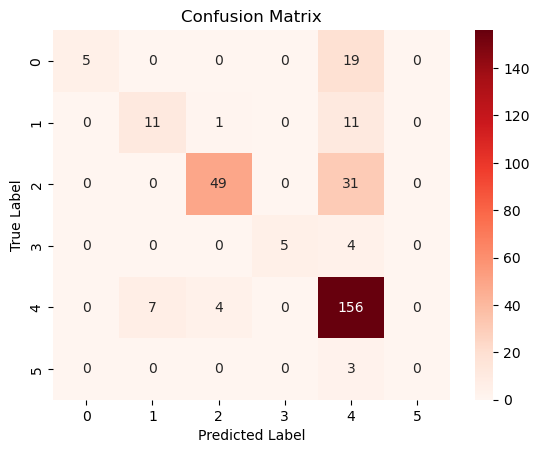

In [615]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### LogisticRegression

In [617]:
%%time
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

CPU times: total: 1.94 s
Wall time: 484 ms


LogisticRegression()

In [620]:
%%time
y_pred_lr = model_lr.predict(X_test_tfidf)

CPU times: total: 31.2 ms
Wall time: 2 ms


In [621]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       1.00      0.30      0.47        23
           2       0.94      0.78      0.85        80
           4       1.00      0.22      0.36         9
           5       0.77      0.98      0.87       167
           6       1.00      0.67      0.80         3

    accuracy                           0.83       306
   macro avg       0.95      0.61      0.70       306
weighted avg       0.86      0.83      0.81       306



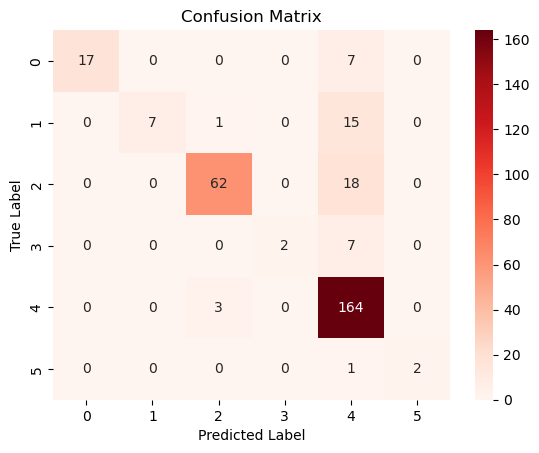

In [622]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### KNeighborsClassifier

In [625]:
%%time
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_tfidf, y_train)

CPU times: total: 0 ns
Wall time: 5 ms


KNeighborsClassifier()

In [626]:
%%time
y_pred_knn = model_knn.predict(X_test_tfidf)

CPU times: total: 109 ms
Wall time: 110 ms


In [628]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.92      0.77        24
           1       0.74      0.74      0.74        23
           2       0.86      0.95      0.90        80
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         9
           5       0.95      0.84      0.89       167
           6       1.00      1.00      1.00         3

    accuracy                           0.88       306
   macro avg       0.75      0.78      0.76       306
weighted avg       0.89      0.88      0.88       306



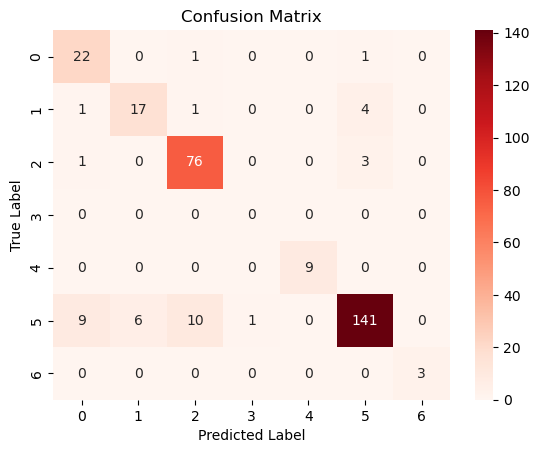

In [630]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Обучение модели

Обучение модели **LogisticRegression** при более равномерном распределении кластеров.

In [105]:
df_sk = pd.read_csv("all_content_parsing_topic_model.csv")
df_sk.head(1)

title namecompany description  \
0  SSTI в Python под микроскопом: разбираем Pytho...     BI.ZONE    Компания   

   rating                                              field        date  \
0   76.41  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   

                                             textpub  views  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN   

                                    dont_number_text  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   

                                          lower_case  \
0  привет, хабр! меня зовут сергей арефьев. я спе...   

                                    punctuation_text  \
0  привет хабр меня зовут сергей арефьев я специа...   

                                       tokenize_text  \
0  ['привет', 'хабр', 'меня', 'зовут', 'сергей', ...   

                                   remove_latin_text  \
0  привет хабр меня зовут сергей арефьев я специа...   

                                   stopwords_russian  \
0  привет хабр зовут сергей арефьев специалист от...   

                                        stemmer_text  \
0  привет хабр зовут серг ареф специалист отдел а...   

                                    lemmatizing_text  \
0  привет хабра звать сергей арефьев специалист о...   

                          lemmatizing_recurring_text  agglmr_cluster  \
0  привет хабра звать сергей арефьев специалист о...               2   

   agglmr_cluster_name                        agglmr_lsa_name  
0  Приложение и работа  Робопсихология/человекоподобный робот

In [107]:
df_sk_nm = df_sk.copy()

agglmr_cluster
5    649
2    300
0    123
1     80
4     43
6     14
3     13
Name: count, dtype: int64


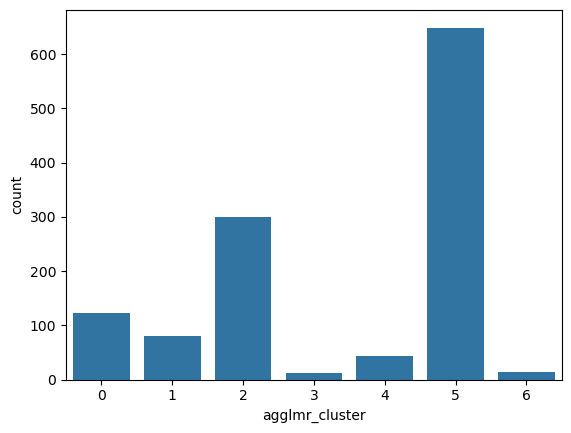

In [109]:
# Смотрим распределение по кластерам
print(df_sk_nm['agglmr_cluster'].value_counts())
sns.countplot(x='agglmr_cluster', data=df_sk_nm)
plt.show()

In [111]:
nc_5 = len(df_sk_nm[df_sk_nm['agglmr_cluster'] == 5])
nc_5 = round(nc_5/2) + 100
nc_5

424

In [113]:
nc_2 = len(df_sk_nm[df_sk_nm['agglmr_cluster'] == 2])
nc_2 = round(nc_2/2) + 50
nc_2

200

In [115]:
df_sk_nm = df_sk_nm.drop(df_sk_nm[df_sk_nm['agglmr_cluster'] == 5].index[:nc_5])

In [117]:
df_sk_nm = df_sk_nm.drop(df_sk_nm[df_sk_nm['agglmr_cluster'] == 2].index[:nc_2])

agglmr_cluster
5    225
0    123
2    100
1     80
4     43
6     14
3     13
Name: count, dtype: int64


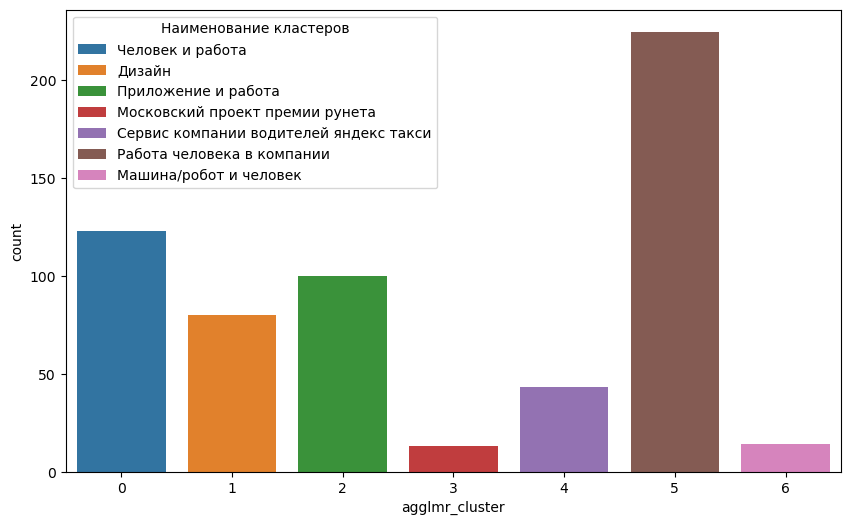

In [464]:
# Смотрим распределение по кластерам
print(df_sk_nm['agglmr_cluster'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='agglmr_cluster', hue='agglmr_cluster_name', data=df_sk_nm, width=0.8)
plt.legend(title='Наименование кластеров')
plt.show()

##### Обновление данных для обучения

In [284]:
from sklearn.model_selection import train_test_split
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(df_sk_nm['lemmatizing_text'], df_sk_nm['agglmr_cluster'], 
                                                    random_state=42)

In [286]:
len(X_train_nm)

448

In [288]:
len(X_test_nm)

150

In [290]:
tfidf_model_vectorizer_mn = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
X_train_tfidf_nm = tfidf_model_vectorizer_mn.fit_transform(X_train_nm)
X_test_tfidf_nm = tfidf_model_vectorizer_mn.transform(X_test_nm)

In [291]:
X_train_tfidf_nm

<448x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 232009 stored elements in Compressed Sparse Row format>

In [292]:
X_test_tfidf_nm

<150x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 71971 stored elements in Compressed Sparse Row format>

##### KNeighborsClassifier

In [295]:
%%time
model_knn_mn = KNeighborsClassifier()
model_knn_mn.fit(X_train_tfidf_nm, y_train_nm)

CPU times: total: 0 ns
Wall time: 3 ms


KNeighborsClassifier()

In [297]:
%%time
y_pred_knn_nm = model_knn_mn.predict(X_test_tfidf_nm)

CPU times: total: 172 ms
Wall time: 41 ms


In [299]:
print(classification_report(y_test_nm, y_pred_knn_nm))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        39
           1       0.96      0.96      0.96        24
           2       0.91      0.84      0.88        25
           3       0.67      1.00      0.80         2
           4       0.82      1.00      0.90         9
           5       0.97      0.71      0.82        48
           6       0.50      1.00      0.67         3

    accuracy                           0.87       150
   macro avg       0.80      0.93      0.84       150
weighted avg       0.89      0.87      0.87       150



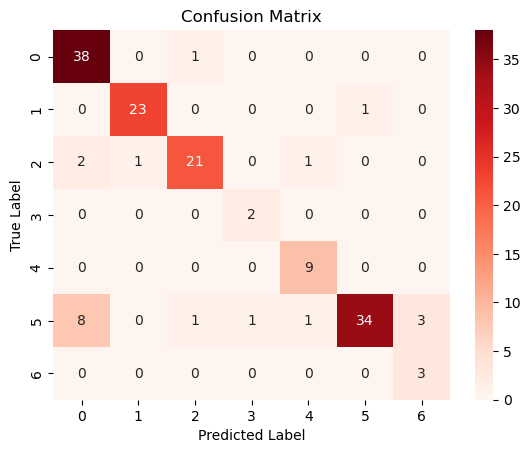

In [314]:
sns.heatmap(confusion_matrix(y_test_nm, y_pred_knn_nm), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Сохранение обновленных моделей

In [330]:
import pickle

In [332]:
model_knn_mn

KNeighborsClassifier()

In [334]:
tfidf_model_vectorizer_mn

TfidfVectorizer(max_features=10000, ngram_range=(1, 3))

In [340]:
# Сохранение модели
with open('tfidf_model_vectorizer_art_v2mn.pkl', 'wb') as file:
    pickle.dump(tfidf_model_vectorizer_mn, file)

In [341]:
# Сохранение модели
with open('model_knn_art_v2mn.pkl', 'wb') as file:
    pickle.dump(model_knn_mn, file)

### Сравнение метрик каждой модели

In [712]:
print('Random Forest \n' + classification_report(y_test, y_pred_rf))
print('-' * 53)
print('Logistic Regression \n' + classification_report(y_test, y_pred_lr))
print('-' * 53)
print('KNeighborsClassifier \n' + classification_report(y_test, y_pred_knn))

Random Forest 
              precision    recall  f1-score   support

           0       1.00      0.21      0.34        24
           1       0.61      0.48      0.54        23
           2       0.91      0.61      0.73        80
           4       1.00      0.56      0.71         9
           5       0.70      0.93      0.80       167
           6       0.00      0.00      0.00         3

    accuracy                           0.74       306
   macro avg       0.70      0.46      0.52       306
weighted avg       0.77      0.74      0.72       306

-----------------------------------------------------
Logistic Regression 
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       1.00      0.30      0.47        23
           2       0.94      0.78      0.85        80
           4       1.00      0.22      0.36         9
           5       0.77      0.98      0.87       167
           6       1.00      0.67      0.8

Было построено 3 модели классификации
* Random Forest
* Logistic Regression
* KNeighborsClassifier

Самый лучший результат в метрике F1-Score показа модель **KNeighborsClassifier**. По распределению метрики по кластерами, были замечены идеальные значения **1.00** и **0.00**, поэтому чтобы модель лучше предсказывала остальные кластеры была выбрана другая модель.

Показатели метрики F1-Score у модели **Logistic Regression** - **0.83**. Распределение по метрики по кластерами более стабильное, отсутствуют идеальные и плохие показатели. 

Для дальнейшей работы была выбрана модель **Logistic Regression**.

## Сохранение моделей

In [687]:
import pickle

In [689]:
clustering_ward

AgglomerativeClustering(n_clusters=7)

In [690]:
model_lr

LogisticRegression()

In [691]:
tfidf_model_vectorizer

TfidfVectorizer(max_features=10000, ngram_range=(1, 3))

#### Сохранение моделей

In [724]:
# Сохранение модели
with open('tfidf_model_vectorizer_art_v1.pkl', 'wb') as file:
    pickle.dump(tfidf_model_vectorizer, file)

In [726]:
# Сохранение модели
with open('model_lr_art_v1.pkl', 'wb') as file:
    pickle.dump(model_lr, file)

#### Загрузка моделей

In [335]:
# Загрузка модели
with open('agglmr_articles_model_v1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [337]:
# Загрузка модели
with open('tfidf_articles_vectorizer_v1.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)

In [339]:
loaded_model

AgglomerativeClustering(n_clusters=10)

In [341]:
loaded_vectorizer

AgglomerativeClustering(n_clusters=10)